# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## 1. Data Gathering / Data Collection

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


* From the website there are some more information that can be extracted. They are as follows:
	1. Dates on which the customer had travlled / Dates on which the customer posted the reviews
    2. Countries the customer had travlled
    3. Number of ratings given by the customer

In [3]:
# Creating an empty list to store the dates on which the customers posted the reviews
dateTravlled = []

# Creating an empty list to store the countries from which the customer has travlled or the reviews posted
country = []

# Creating an empty list to store the number of Ratings given by customers
numOfRatings = []

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100


# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html5')

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    for j in parsed_content.find_all('time'):
        dateTravlled.append(j.text)
    
    for k in parsed_content.find_all('h3'):
        country.append(k.span.next_sibling.text.strip(' ()'))
        
    for l in soup.find_all('div', class_ = 'rating-10'):
        try:
            numOfRatings.append(l.span.text)
        except:
            numOfRatings.append("Null")

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10


* Check the length of the data extracted from the website

In [5]:
print(f"Length of the reviews : {len(reviews)}")

print(f"Length of the country : {len(country)}")

print(f"Length of the dateTravlled : {len(dateTravlled)}")

print(f"Length of the numOfRatings : {len(numOfRatings)}")

Length of the reviews : 1000
Length of the country : 1000
Length of the dateTravlled : 1000
Length of the numOfRatings : 1010


##### * Note : All the data extacted should be of same size

The size of "numOfRatings" is more than other variables

In [6]:
numOfRatings = numOfRatings[:1000]
print(f"Length of the numOfRatings : {len(numOfRatings)}")

Length of the numOfRatings : 1000


#### * Consizing all the extracted data into a DataFrame

In [7]:
df = pd.DataFrame({"Date": dateTravlled, "Country" : country, "Reviews" : reviews, "Ratings" : numOfRatings,})

#### * Initial 5 Rows of the dataset

In [8]:
df.head()

,Date,Country,Reviews,Ratings
0,8th May 2023,Australia,✅ Trip Verified | I will never travel with Br...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5
1,6th May 2023,United Kingdom,✅ Trip Verified | I am already in Portugal so...,1
2,6th May 2023,United Kingdom,✅ Trip Verified | Terrible. Avoid this airlin...,1
3,1st May 2023,United Kingdom,✅ Trip Verified | Despite being a gold member...,1
4,28th April 2023,United Kingdom,Not Verified | Regarding the aircraft and seat...,2


* Shape of the Dataset

In [9]:
print(f"Shape of the dataset : {df.shape}")

Shape of the dataset : (1000, 4)


* The dataset contains 1000 rows (Observations) and 4 columns (Features)

#### * Storing the dataset into CSV format

In [10]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## 2. Exploratory Data Analysis

#### * Initial 5 rows of the Dataset

In [11]:
df.head()

,Date,Country,Reviews,Ratings
0,8th May 2023,Australia,✅ Trip Verified | I will never travel with Br...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5
1,6th May 2023,United Kingdom,✅ Trip Verified | I am already in Portugal so...,1
2,6th May 2023,United Kingdom,✅ Trip Verified | Terrible. Avoid this airlin...,1
3,1st May 2023,United Kingdom,✅ Trip Verified | Despite being a gold member...,1
4,28th April 2023,United Kingdom,Not Verified | Regarding the aircraft and seat...,2


#### * Information about the Dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     1000 non-null   object
 1   Country  1000 non-null   object
 2   Reviews  1000 non-null   object
 3   Ratings  1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


#### * Description about the Dataset

In [13]:
df.describe()

,Date,Country,Reviews,Ratings
count,1000,1000,1000,1000
unique,704,52,1000,11
top,8th December 2019,United Kingdom,✅ Trip Verified | I will never travel with Br...,1
freq,7,581,1,313


#### * Checking whether dataset contains missing data

In [14]:
df.isnull().sum()

Date       0
Country    0
Reviews    0
Ratings    0
dtype: int64

* The dataset extracted does not contain any missing data

In [15]:
df.reset_index(drop = True, inplace = True)

## 3. Data Cleaning

	* Data Cleaning is a form of Data Management.
    
    * A Data Cleaning process involves inspecting all of the data in a database and updating or removing information that is incomplete, incorrect, incorrectly formatted, duplicated or irrelavnt. 

In [16]:
df.Date = pd.to_datetime(df.Date)

In [17]:
df.Ratings.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '1', '2', '5', '10', '3', '4',
       '9', '7', '8', '6'], dtype=object)

In [18]:
df.Ratings = df.Ratings.str.strip("'\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [19]:
df.Ratings.value_counts()

1     313
2     112
10    101
3      95
9      81
8      78
5      62
7      60
4      57
6      41
Name: Ratings, dtype: int64

In [20]:
df[['Trip_Status', 'Reviews']] = df.Reviews.str.split('|', expand = True)

In [21]:
df.Ratings.value_counts()

1     313
2     112
10    101
3      95
9      81
8      78
5      62
7      60
4      57
6      41
Name: Ratings, dtype: int64

In [22]:
df['Trip_Status'] = df['Trip_Status'].str.strip('✅')
df['Trip_Status'] = df['Trip_Status'].str.strip('❎')
df['Trip_Status'] = df['Trip_Status'].str.strip()

In [23]:
df['Trip_Status'].value_counts()

Trip Verified    813
Not Verified     187
Name: Trip_Status, dtype: int64

In [24]:
df.head()

,Date,Country,Reviews,Ratings,Trip_Status
0,2023-05-08,Australia,I will never travel with British Airways aga...,5,Trip Verified
1,2023-05-06,United Kingdom,I am already in Portugal so contacted them t...,1,Trip Verified
2,2023-05-06,United Kingdom,Terrible. Avoid this airline. It’s now becom...,1,Trip Verified
3,2023-05-01,United Kingdom,"Despite being a gold member, the British Air...",1,Trip Verified
4,2023-04-28,United Kingdom,Regarding the aircraft and seat: The business...,2,Not Verified


#### * Cleaning the Reviews

In [25]:
import re

In [26]:
def clean_Reviews(txt):
    txt = re.sub('[^A-Za-z]+', ' ', str(txt))
    return txt

In [27]:
df['Cleaned_Reviews'] = df['Reviews'].apply(clean_Reviews)

In [28]:
df = df.drop(columns = ['Reviews'])
df.head()

,Date,Country,Ratings,Trip_Status,Cleaned_Reviews
0,2023-05-08,Australia,5,Trip Verified,I will never travel with British Airways agai...
1,2023-05-06,United Kingdom,1,Trip Verified,I am already in Portugal so contacted them to...
2,2023-05-06,United Kingdom,1,Trip Verified,Terrible Avoid this airline It s now becoming...
3,2023-05-01,United Kingdom,1,Trip Verified,Despite being a gold member the British Airwa...
4,2023-04-28,United Kingdom,2,Not Verified,Regarding the aircraft and seat The business ...


#### * Extraction of STEM WORDS from the Dataset (Cleaned_Reviews)

In [29]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [30]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [31]:
pos = {'N':wordnet.NOUN, 'V':wordnet.VERB, 'J':wordnet.ADJ, 'R':wordnet.ADV}

In [32]:
def stopwords_token(txt):
    
    pos_Tags = pos_tag(word_tokenize(txt))
    
    pos_TagList = []
    for p_word, p_Tag in pos_Tags:
        if p_word.lower() not in set(stopwords.words('english')):
            pos_TagList.append(tuple([p_word, pos.get(p_Tag[0])]))

    return pos_TagList

In [33]:
df['Pos_Tags'] = df['Cleaned_Reviews'].apply(stopwords_token)

In [34]:
df.head()

,Date,Country,Ratings,Trip_Status,Cleaned_Reviews,Pos_Tags
0,2023-05-08,Australia,5,Trip Verified,I will never travel with British Airways agai...,"[(never, r), (travel, v), (British, a), (Airwa..."
1,2023-05-06,United Kingdom,1,Trip Verified,I am already in Portugal so contacted them to...,"[(already, r), (Portugal, n), (contacted, v), ..."
2,2023-05-06,United Kingdom,1,Trip Verified,Terrible Avoid this airline It s now becoming...,"[(Terrible, a), (Avoid, n), (airline, n), (bec..."
3,2023-05-01,United Kingdom,1,Trip Verified,Despite being a gold member the British Airwa...,"[(Despite, None), (gold, n), (member, n), (Bri..."
4,2023-04-28,United Kingdom,2,Not Verified,Regarding the aircraft and seat The business ...,"[(Regarding, v), (aircraft, n), (seat, v), (bu..."


In [35]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [36]:
def lemmatization(p_tag_data):
    lemmatize_tags = " "
    for word, pos in p_tag_data:
     if not pos:
        lemma = word
        lemmatize_tags = lemmatize_tags + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemmatize_tags = lemmatize_tags + " " + lemma
    return lemmatize_tags

In [37]:
df['Lemmatization'] = df['Pos_Tags'].apply(lemmatization)

In [38]:
df.head()

,Date,Country,Ratings,Trip_Status,Cleaned_Reviews,Pos_Tags,Lemmatization
0,2023-05-08,Australia,5,Trip Verified,I will never travel with British Airways agai...,"[(never, r), (travel, v), (British, a), (Airwa...",never travel British Airways spend business ...
1,2023-05-06,United Kingdom,1,Trip Verified,I am already in Portugal so contacted them to...,"[(already, r), (Portugal, n), (contacted, v), ...",already Portugal contact today cancel return...
2,2023-05-06,United Kingdom,1,Trip Verified,Terrible Avoid this airline It s now becoming...,"[(Terrible, a), (Avoid, n), (airline, n), (bec...",Terrible Avoid airline become regular practi...
3,2023-05-01,United Kingdom,1,Trip Verified,Despite being a gold member the British Airwa...,"[(Despite, None), (gold, n), (member, n), (Bri...",Despite gold member British Airways staff He...
4,2023-04-28,United Kingdom,2,Not Verified,Regarding the aircraft and seat The business ...,"[(Regarding, v), (aircraft, n), (seat, v), (bu...",Regarding aircraft seat business class seat ...


### * Sentiment Analysis using VADER

#### VADER : Valence Aware Dictionary and Sentiment Resoner

In [39]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.7 MB/s eta 0:00:00


In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [41]:
sentiment_Analyzer = SentimentIntensityAnalyzer()

In [42]:
def vader_SentimentAnalysis(review):
    v_SA = sentiment_Analyzer.polarity_scores(review)
    
    return v_SA['compound']

In [43]:
df['Sentiment_Score'] = df['Lemmatization'].apply(vader_SentimentAnalysis)

In [44]:
df.head()

,Date,Country,Ratings,Trip_Status,Cleaned_Reviews,Pos_Tags,Lemmatization,Sentiment_Score
0,2023-05-08,Australia,5,Trip Verified,I will never travel with British Airways agai...,"[(never, r), (travel, v), (British, a), (Airwa...",never travel British Airways spend business ...,-0.9643
1,2023-05-06,United Kingdom,1,Trip Verified,I am already in Portugal so contacted them to...,"[(already, r), (Portugal, n), (contacted, v), ...",already Portugal contact today cancel return...,-0.2263
2,2023-05-06,United Kingdom,1,Trip Verified,Terrible Avoid this airline It s now becoming...,"[(Terrible, a), (Avoid, n), (airline, n), (bec...",Terrible Avoid airline become regular practi...,-0.7430
3,2023-05-01,United Kingdom,1,Trip Verified,Despite being a gold member the British Airwa...,"[(Despite, None), (gold, n), (member, n), (Bri...",Despite gold member British Airways staff He...,0.7951
4,2023-04-28,United Kingdom,2,Not Verified,Regarding the aircraft and seat The business ...,"[(Regarding, v), (aircraft, n), (seat, v), (bu...",Regarding aircraft seat business class seat ...,0.8676


In [45]:
def sentimentAnalysis_vader(compound):
    if compound >= 0.5:
        return 'Positive'
    
    elif compound < 0:
        return 'Negative'
    
    else:
        return 'Neutral'

In [46]:
df['Sentiment_Analysis'] = df['Sentiment_Score'].apply(sentimentAnalysis_vader)

In [47]:
df.head()

,Date,Country,Ratings,Trip_Status,Cleaned_Reviews,Pos_Tags,Lemmatization,Sentiment_Score,Sentiment_Analysis
0,2023-05-08,Australia,5,Trip Verified,I will never travel with British Airways agai...,"[(never, r), (travel, v), (British, a), (Airwa...",never travel British Airways spend business ...,-0.9643,Negative
1,2023-05-06,United Kingdom,1,Trip Verified,I am already in Portugal so contacted them to...,"[(already, r), (Portugal, n), (contacted, v), ...",already Portugal contact today cancel return...,-0.2263,Negative
2,2023-05-06,United Kingdom,1,Trip Verified,Terrible Avoid this airline It s now becoming...,"[(Terrible, a), (Avoid, n), (airline, n), (bec...",Terrible Avoid airline become regular practi...,-0.7430,Negative
3,2023-05-01,United Kingdom,1,Trip Verified,Despite being a gold member the British Airwa...,"[(Despite, None), (gold, n), (member, n), (Bri...",Despite gold member British Airways staff He...,0.7951,Positive
4,2023-04-28,United Kingdom,2,Not Verified,Regarding the aircraft and seat The business ...,"[(Regarding, v), (aircraft, n), (seat, v), (bu...",Regarding aircraft seat business class seat ...,0.8676,Positive


#### * Count of Vader Sentiment Analysis

In [48]:
vader_SA_Count = df['Sentiment_Analysis'].value_counts()
vader_SA_Count

Positive    521
Negative    373
Neutral     106
Name: Sentiment_Analysis, dtype: int64

## * Data Visualisation

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.patches.Wedge at 0x7ff816953040>,
 [Text(-0.07251825311279125, 1.0976069893023956, 'Positive'),
  Text(-0.29026018409844623, -1.0610132070465175, 'Negative'),
  Text(1.275835215204122, -0.44129865583870975, 'Neutral')],
 [Text(-0.03955541078879523, 0.5986947214376703, '52.1%'),
  Text(-0.15832373678097067, -0.5787344765708277, '37.3%'),
  Text(0.80330365401741, -0.27785470923178024, '10.6%')])

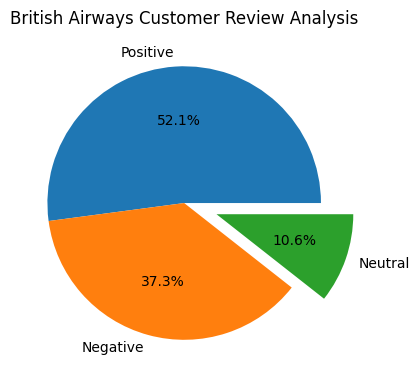

In [50]:
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("British Airways Customer Review Analysis")
plt.pie(vader_SA_Count.values, labels = vader_SA_Count.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [52]:
df['Sentiment_Analysis'].value_counts()

Positive    521
Negative    373
Neutral     106
Name: Sentiment_Analysis, dtype: int64

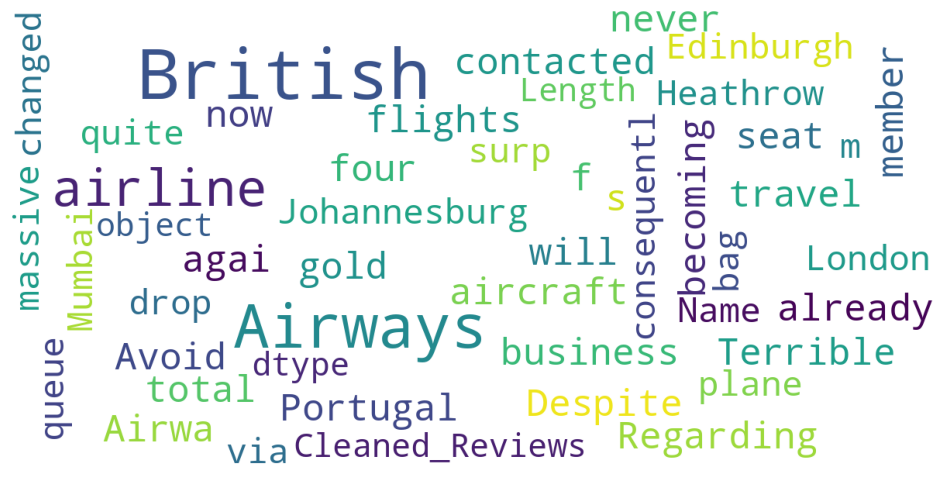

In [51]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Cleaned_Reviews)

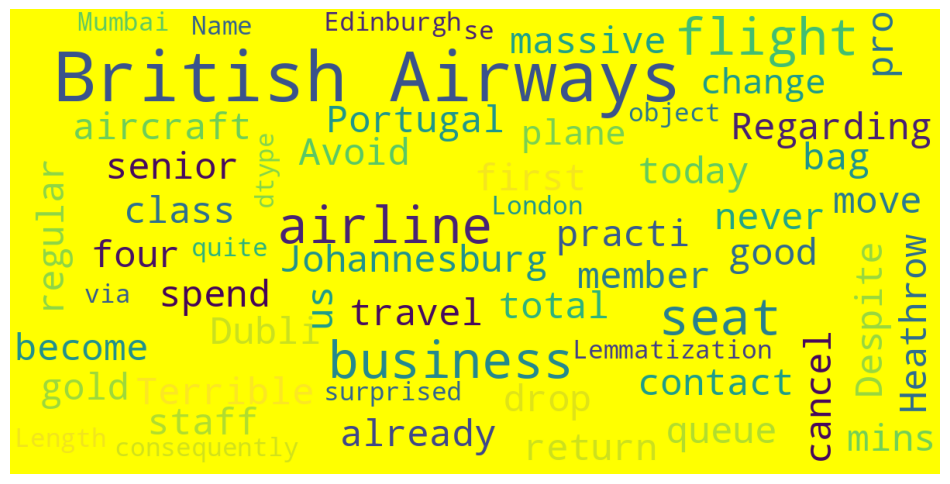

In [54]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='Yellow',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemmatization)

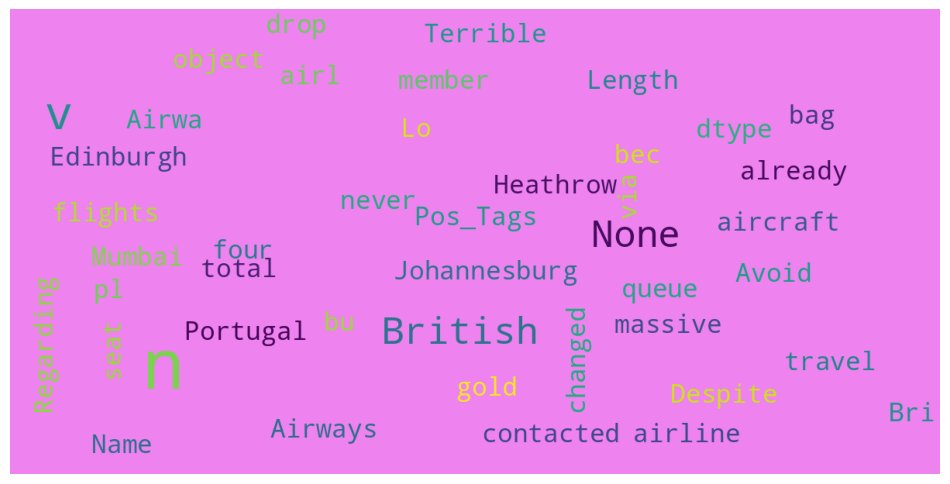

In [58]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='Violet',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Pos_Tags)